In [202]:
import numpy as np
import scipy as sp
from scipy.fft import fft2
from scipy.fft import ifft2
from scipy.fft import fftfreq
from scipy.fft import fftshift
import imageio
import cv2

import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import animation
from matplotlib.animation import PillowWriter
import pint

u = pint.UnitRegistry()

In [203]:
def compute_U(U0, xv, yv, lam, z):
    A = fft2(U0) #fourier transform of U
    kx = 2*np.pi * fftfreq(len(x), np.diff(x)[0]) #angular frequency
    kxv, kyv = np.meshgrid(kx,kx) 
    k = 2*np.pi/lam 
    return ifft2(A*np.exp(1j*z*np.sqrt(k**2-kxv**2-kyv**2))) #taking inverse fourier transform

## Single Slit Experiment

In [256]:
D = 0.1 * u.mm
lam = 660 * u.nm

In [257]:
x = np.linspace(-2,2,1600) * u.mm
xv, yv = np.meshgrid(x, x) #defining the grid 

In [258]:
U0 = (np.abs(xv)< D/2) * (np.abs(yv)<0.5*u.mm) #defining the slit
U0 = U0.astype(float)

Here, we define the slit 

/Users/freyashah/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:701: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  x = np.array(x, subok=True, copy=copy)


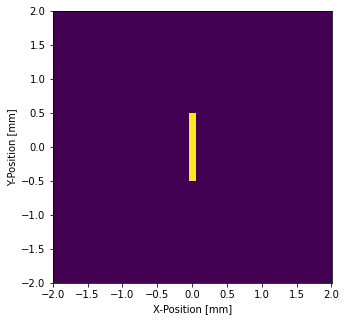

In [259]:
plt.figure(figsize=(5,5))
plt.pcolormesh(xv,yv,U0)
plt.xlabel('X-Position [mm]')
plt.ylabel('Y-Position [mm]')
plt.show()

In [260]:
A = fft2(U0) #fourier coefficients of U
kx = fftfreq(len(x), np.diff(x)[0]) * 2 * np.pi 
kxv, kyv = np.meshgrid(kx,kx)

### Diffraction Pattern
When we take the fourier transform of the hemholtz equation we get the diffraction pattern we recieve when we pass the light from the slit.

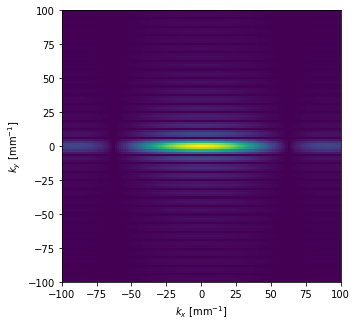

In [261]:
plt.figure(figsize=(5,5))
plt.pcolormesh(fftshift(kxv.magnitude), fftshift(kyv.magnitude), np.abs(fftshift(A)))
plt.xlabel('$k_x$ [mm$^{-1}$]')
plt.ylabel('$k_y$ [mm$^{-1}$]')
plt.xlim(-100,100)
plt.ylim(-100,100)
plt.show()

In [210]:
k = 2*np.pi / (lam)
d = 3* u.cm #screen distance from the slit

In [211]:
U = compute_U(U0, xv, yv, lam, z=d)

Taking the inverse fourier transform to get back the orginal slit approximation.

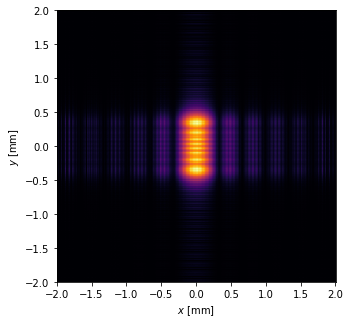

In [212]:
plt.figure(figsize=(5,5))
plt.pcolormesh(xv,yv,np.abs(U), cmap='inferno')
plt.xlabel('$x$ [mm]')
plt.ylabel('$y$ [mm]')
plt.show()

The intensity pattern for a particular cross section

/Users/freyashah/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


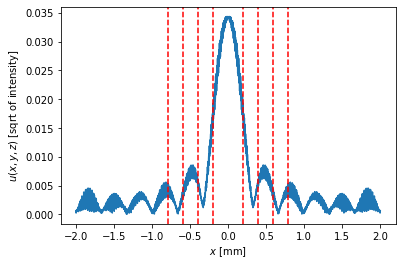

In [213]:
m  = np.arange(1,5,1)
x_min = np.sqrt(m**2 * lam**2 * d**2 / (D**2 - m**2 * lam**2)).to('mm')
plt.plot(x, np.abs(U)[250])
[plt.axvline(x.magnitude, ls='--', color='r') for x in x_min]
[plt.axvline(-x.magnitude, ls='--', color='r') for x in x_min]
plt.xlabel('$x$ [mm]')
plt.ylabel('$u(x,y,z)$ [sqrt of intensity]')
plt.show()


We do similar experiments with different slits below.

## Double Slit Experiment

In [228]:
S = 0.2*u.mm
D = 0.05*u.mm
x = np.linspace(-4,4,3200) * u.mm
xv, yv = np.meshgrid(x, x)

U0 = (np.abs(xv-S/2)< D/2) * (np.abs(yv)<2*u.mm) + (np.abs(xv+S/2)< D/2) * (np.abs(yv)<2*u.mm)
U0 = U0.astype(float)

/Users/freyashah/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:701: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  x = np.array(x, subok=True, copy=copy)


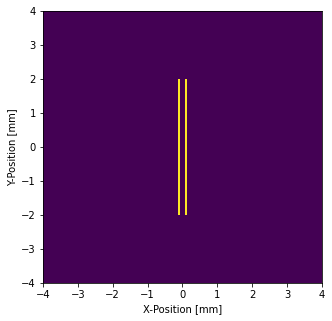

In [229]:
plt.figure(figsize=(5,5))
plt.pcolormesh(xv,yv,U0)
plt.xlabel('X-Position [mm]')
plt.ylabel('Y-Position [mm]')
plt.show()

In [230]:
A = fft2(U0) #fourier coefficients of U
kx = fftfreq(len(x), np.diff(x)[0]) * 2 * np.pi 
kxv, kyv = np.meshgrid(kx,kx)

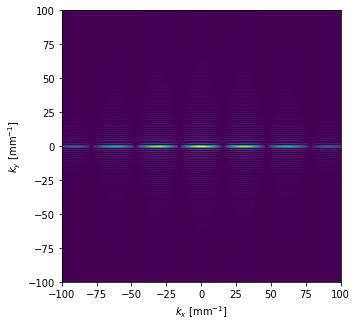

In [231]:
plt.figure(figsize=(5,5))
plt.pcolormesh(fftshift(kxv.magnitude), fftshift(kyv.magnitude), np.abs(fftshift(A)))
plt.xlabel('$k_x$ [mm$^{-1}$]')
plt.ylabel('$k_y$ [mm$^{-1}$]')
plt.xlim(-100,100)
plt.ylim(-100,100)
plt.show()

In [233]:

U = compute_U(U0, xv, yv, lam, z=5*u.cm)

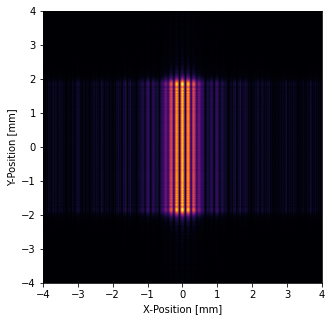

In [234]:
plt.figure(figsize=(5,5))
plt.pcolormesh(xv,yv,np.abs(U), cmap='inferno')
plt.xlabel('X-Position [mm]')
plt.ylabel('Y-Position [mm]')
plt.show()

/Users/freyashah/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


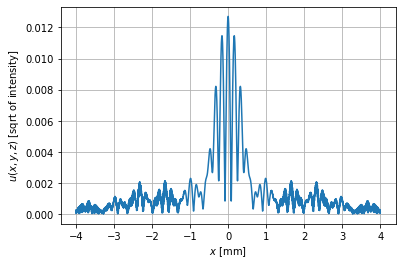

In [235]:
central_line = np.abs(U)[250]

plt.plot(x, central_line)
plt.xlabel('$x$ [mm]')
plt.ylabel('$u(x,y,z)$ [sqrt of intensity]')
plt.grid()

## Triangular Slit

In [236]:
S = 0.5*u.mm
D = 0.05*u.mm
x = np.linspace(-4,4,3200) * u.mm
xv, yv = np.meshgrid(x, x)

U0 =  (np.abs(xv+(yv)/2+S/2)< D/2) * (np.abs(yv)<1*u.mm) + (np.abs(xv-(yv)/2-S*1.4)< D/2) * (np.abs(yv)<1*u.mm)+(np.abs(yv-2*S)< D/2) * (np.abs(xv-S/2)<1*u.mm)
U0 = U0.astype(float)

/Users/freyashah/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:701: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  x = np.array(x, subok=True, copy=copy)


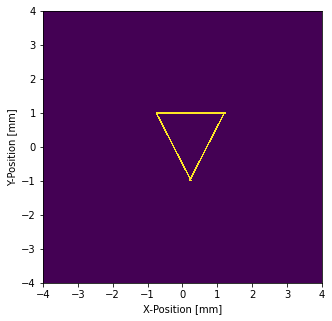

In [237]:
plt.figure(figsize=(5,5))
plt.pcolormesh(xv,yv,U0)
plt.xlabel('X-Position [mm]')
plt.ylabel('Y-Position [mm]')
plt.show()

In [238]:
A = fft2(U0)
kx = fftfreq(len(x), np.diff(x)[0]) * 2 * np.pi 
kxv, kyv = np.meshgrid(kx,kx)

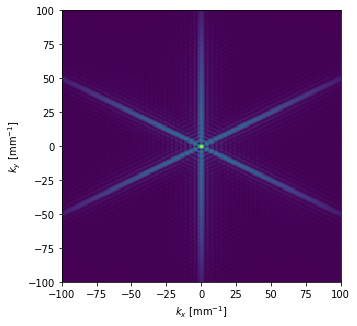

In [239]:
plt.figure(figsize=(5,5))
plt.pcolormesh(fftshift(kxv.magnitude), fftshift(kyv.magnitude), np.abs(fftshift(A)))
plt.xlabel('$k_x$ [mm$^{-1}$]')
plt.ylabel('$k_y$ [mm$^{-1}$]')
plt.xlim(-100,100)
plt.ylim(-100,100)
plt.show()

In [240]:

U = compute_U(U0, xv, yv, lam, z=5*u.cm)

/Users/freyashah/opt/anaconda3/lib/python3.8/site-packages/scipy/fft/_pocketfft/helper.py:98: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.array(x, dtype=dtype, copy=copy)


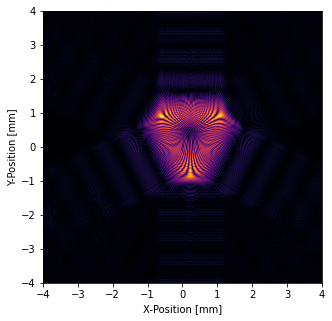

In [241]:
plt.figure(figsize=(5,5))
plt.pcolormesh(xv,yv,np.abs(U), cmap='inferno')
plt.xlabel('X-Position [mm]')
plt.ylabel('Y-Position [mm]')
plt.show()

/Users/freyashah/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


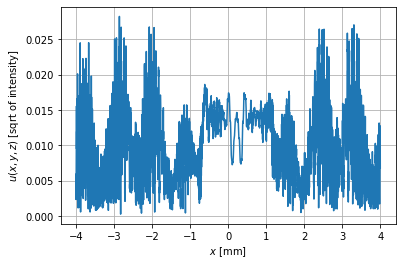

In [242]:
central_line = np.abs(U)[300]

plt.plot(x, central_line)
plt.xlabel('$x$ [mm]')
plt.ylabel('$u(x,y,z)$ [sqrt of intensity]')
plt.grid()

## Square Slit

In [248]:
S = 0.5*u.mm
D = 0.05*u.mm
x = np.linspace(-4,4,3200) * u.mm
xv, yv = np.meshgrid(x, x)

U0 =  ((np.abs(yv-5*S)< D/2) * (np.abs(xv-S/2)<1*u.mm)+(np.abs(yv-S)< D/2) * (np.abs(xv-S/2)<1*u.mm)+(np.abs(xv-2.5*S)< D/2) * (np.abs(yv-3*S)<1*u.mm)+(np.abs(xv+1.5*S)< D/2) * (np.abs(yv-3*S)<1*u.mm))
U0 = U0.astype(float)

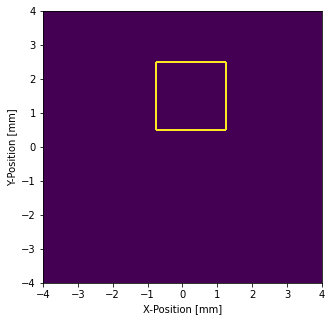

In [249]:
plt.figure(figsize=(5,5))
plt.pcolormesh(xv,yv,U0)
plt.xlabel('X-Position [mm]')
plt.ylabel('Y-Position [mm]')
plt.show()

In [250]:
A = fft2(U0)
kx = fftfreq(len(x), np.diff(x)[0]) * 2 * np.pi 
kxv, kyv = np.meshgrid(kx,kx)

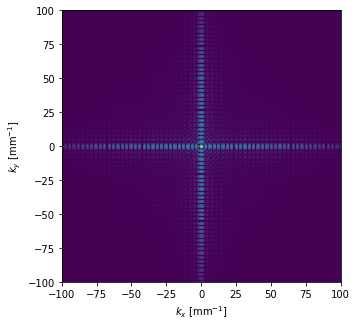

In [251]:
plt.figure(figsize=(5,5))
plt.pcolormesh(fftshift(kxv.magnitude), fftshift(kyv.magnitude), np.abs(fftshift(A)))
plt.xlabel('$k_x$ [mm$^{-1}$]')
plt.ylabel('$k_y$ [mm$^{-1}$]')
plt.xlim(-100,100)
plt.ylim(-100,100)
plt.show()

In [252]:
U = compute_U(U0, xv, yv, lam, z=5*u.cm)

/Users/freyashah/opt/anaconda3/lib/python3.8/site-packages/scipy/fft/_pocketfft/helper.py:98: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.array(x, dtype=dtype, copy=copy)


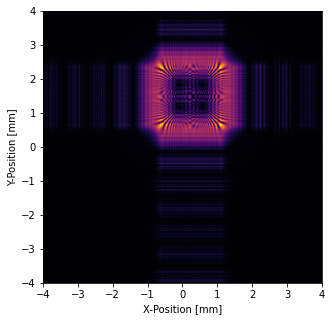

In [253]:
plt.figure(figsize=(5,5))
plt.pcolormesh(xv,yv,np.abs(U), cmap='inferno')
plt.xlabel('X-Position [mm]')
plt.ylabel('Y-Position [mm]')
plt.show()

/Users/freyashah/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


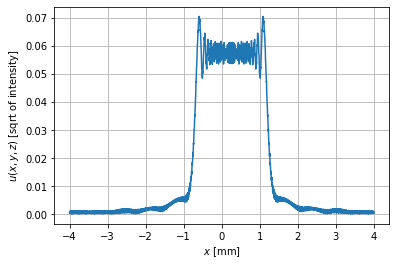

In [254]:
central_line = np.abs(U)[300]

plt.plot(x, central_line)
plt.xlabel('$x$ [mm]')
plt.ylabel('$u(x,y,z)$ [sqrt of intensity]')
plt.grid()